In [2]:
import pandas as pd

df = pd.read_excel('.\Covidpaper\Masih_Data6.xlsx')


In [3]:
### compute number of NaN
print(len(df))
print(len(df.columns))
print(len(df.dropna()))
print(df.isnull().sum())

245
43
185
Unnamed: 0      0
دموگرافی        0
Unnamed: 2      1
Unnamed: 3      0
Unnamed: 4      0
Unnamed: 5      0
Unnamed: 6      0
بالینی          0
Unnamed: 8      0
Unnamed: 9      0
Unnamed: 10     0
Unnamed: 11     0
Unnamed: 12     0
CBC             0
Unnamed: 14     0
Unnamed: 15     0
Unnamed: 16     0
Unnamed: 17     0
Unnamed: 18     0
Unnamed: 19     0
Unnamed: 20     0
Unnamed: 21     0
Unnamed: 22     0
Unnamed: 23     0
coagolation     0
Unnamed: 25     0
Unnamed: 26     0
Unnamed: 27     0
kiddney         0
Unnamed: 29     0
liver           0
Unnamed: 31     0
Unnamed: 32     0
Unnamed: 33     0
Unnamed: 34     0
blood gas       0
Unnamed: 36     0
Unnamed: 37     0
Unnamed: 38     0
Unnamed: 39    28
Unnamed: 40     0
Unnamed: 41     0
Unnamed: 42    48
dtype: int64


In [4]:
print(df['Unnamed: 39'].isnull().sum())
print(df['Unnamed: 42'].isnull().sum())
print(df['Unnamed: 2'].isnull().sum())
##HW1 : create a loop to find number of Nans in each columns

##HW2 : find that the only Nan in c2 belongs to which row 



28
48
1


In [5]:
### remove nan in df
df1 = df.drop(['Unnamed: 39', 'Unnamed: 42'], axis = 1)
df2 = df1.drop(index=27)

df2 = df2.drop(index=0)

x1 = df2.values



In [6]:
#split data to features and labels
import numpy as np 
Y = x1[:,0]  #labels
X = x1[:,1:] #features
print(Y.shape)
print(X.shape)
print(type(Y[0]))
np.save('./Masihdataarray.npy',x1)
labels = Y.astype('int')

(243,)
(243, 40)
<class 'int'>


In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
selector = SelectKBest(score_func = chi2, k = 15).fit(X,Y.astype('int'))

np.set_printoptions(precision = 3)
print(np.sort(selector.scores_))
features = selector.transform(X)
print(features.shape)



[1.246e-02 2.109e-02 1.067e-01 5.109e-01 8.658e-01 8.889e-01 1.498e+00
 2.402e+00 3.297e+00 3.381e+00 3.442e+00 3.448e+00 3.539e+00 4.212e+00
 5.330e+00 6.656e+00 6.796e+00 7.880e+00 8.276e+00 1.088e+01 1.473e+01
 1.665e+01 4.399e+01 5.007e+01 5.031e+01 7.995e+01 1.107e+02 1.276e+02
 1.301e+02 1.593e+02 5.943e+02 6.744e+02 1.025e+03 1.287e+03 1.391e+03
 2.707e+03 2.749e+03 4.808e+03 6.803e+03 7.014e+03]
(243, 15)


In [8]:
### Normalization

from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(features)

X_scaled = scaler.transform(features)


In [9]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X_scaled, 
                                            labels, test_size=0.20, random_state=0, shuffle= True)

In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 50, solver = 'lbfgs', activation= 'relu', alpha = 1e-3,
                    hidden_layer_sizes=(40,40),random_state = 0)

clf.fit(features_train,labels_train)
estimated_label = clf.predict(features_test)
print(estimated_label)
print(labels_test)

accuracy = clf.score(features_train,labels_train)
print("Train accuracy : ", accuracy)

accuracy = clf.score(features_test,labels_test)
print("Test accuracy : ", accuracy)

[1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 0 0 0 1]
Train accuracy :  1.0
Test accuracy :  0.8571428571428571


In [11]:
## Advance learning

acc_train = []
acc_test = []
for i in range(1,301):
    # features_train, features_test, labels_train, labels_test = train_test_split(X_scaled, 
    #                                         labels, test_size=0.20, random_state=0, shuffle= True)
    clf = MLPClassifier(max_iter = 100, solver = 'adam', activation= 'relu', alpha = 1e-3,
                    hidden_layer_sizes=(i),random_state = 0)

    clf.fit(features_train,labels_train)

    acc_train.append(clf.score(features_train,labels_train))
    acc_test.append(clf.score(features_test,labels_test))

c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converge

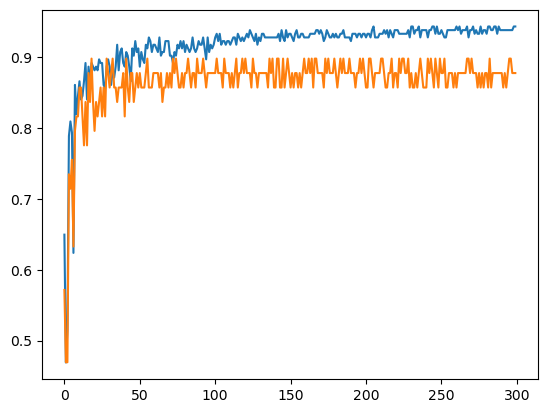

In [12]:
import matplotlib.pyplot as plt
plt.plot(acc_train)
plt.plot(acc_test)
plt.show()

In [13]:
## K fold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

### Normalization

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import numpy as np
scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)
x = X_scaled
y = Y.astype('int')

##impementing cross validation
k = 5
kf = KFold(n_splits = k, shuffle = True)
clf = MLPClassifier(max_iter = 350, solver = 'adam', hidden_layer_sizes = (50), random_state = 1)
acc_score = []
IsFirst_Time = True
for train_index, test_index in kf.split(x):
    x_train , x_test = x[train_index,:], x[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    clf.fit(x_train, y_train)
    pred_values = clf.predict(x_test)
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
    
avg_score = sum(acc_score)/k

c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converge

In [14]:
##PCA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

### Normalization

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import numpy as np


scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)
x = X_scaled
y = Y.astype('int')
pca = PCA(n_components=15)
pca.fit(X_scaled)
# PCA can reduce features and then decrese computational cost
X_reduced = pca.transform(X_scaled)

acc_score = []
IsFirst_Time = True
for train_index, test_index in kf.split(x):
    x_train , x_test = x[train_index,:], x[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    clf.fit(x_train, y_train)
    pred_values = clf.predict(x_test)
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

    #Confussion matrix
    if (IsFirst_Time):
        pred_val = pred_values
        y_tr = y_test
        IsFirst_Time = False
    else:
        pred_val = np.concatenate((pred_val, pred_values))
        y_tr = np.concatenate((y_tr, y_test))
avg_score = sum(acc_score)/k

c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mashadservice.ir\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converge

[[103  11]
 [ 16 113]]
[[0.904 0.096]
 [0.124 0.876]]


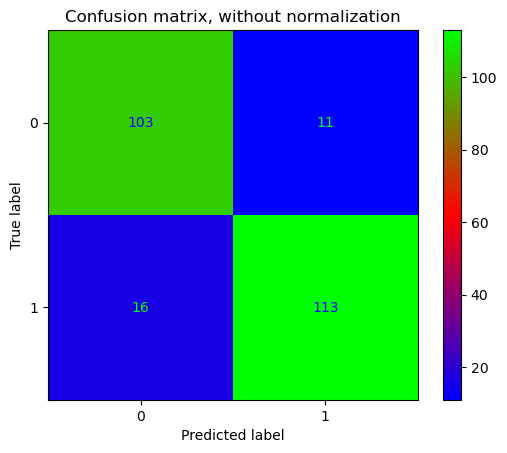

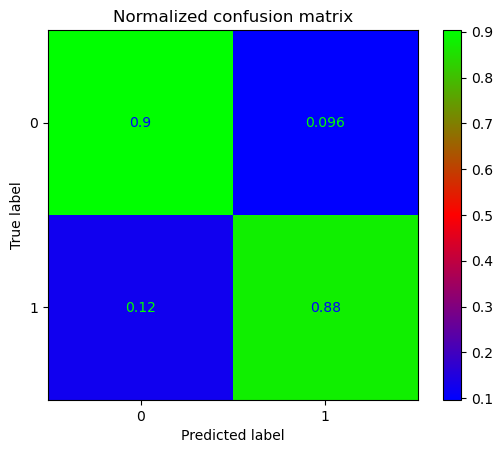

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true")
]

for title, normalize in title_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_tr,
        pred_val,
        # display_labels = load_iris().target_names,
        cmap = plt.cm.brg,
        normalize= normalize,
    )
    disp.ax_.set_title(title)
    print(disp.confusion_matrix)

plt.show()

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
## accuracy_score = (tp + tn)/(tp + tn + fp + fn)
print(accuracy_score(y_tr, pred_val))
##f1_score: f1=2*(precision*recall)/(precission+recall)
print(f1_score(y_tr,pred_val))
##precission=tp/(tp+fp)
print(precision_score(y_tr,pred_val))
##recall=tp/(tp+fn)
print(recall_score(y_tr, pred_val))

0.8888888888888888
0.893280632411067
0.9112903225806451
0.875968992248062


In [22]:
from sklearn.metrics import classification_report
target_names = ['Alive', 'Dead']
print(classification_report(y_tr, pred_val, target_names= target_names))


              precision    recall  f1-score   support

       Alive       0.87      0.90      0.88       114
        Dead       0.91      0.88      0.89       129

    accuracy                           0.89       243
   macro avg       0.89      0.89      0.89       243
weighted avg       0.89      0.89      0.89       243



In [24]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_tr, pred_val).ravel()
sp = tn/(tn+fp)
print(sp)

0.9035087719298246
